In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statsmodels 


%matplotlib inline

In [41]:
#conda install -c conda-forge statsmodels

In [42]:
#pip install statsmodels

In [43]:
df = pd.read_csv('/Users/alexkmc33/Library/CloudStorage/OneDrive-CityUniversityofNewYork/QC econometrics Spring 2023/lab/ipumps_data.csv', header =0)
df.head(10)

,year,serial,month,hwtfinl,cpsid,asecflag,asecwth,pernum,wtfinl,cpsidp,...,citizen,educ,occly,indly,workly,wkswork1,uhrsworkly,ftotval,inctot,incwage
0,2022,1,march,NaN,20210102744400,asec,2553.13,1,NaN,20210102744401,...,born in u.s,"associate's degree, occupational/vocational pr...",2805,6670,yes,52,40,44220,44220,44200
1,2022,5,march,NaN,20211202723000,asec,1586.80,1,NaN,20211202723001,...,born in u.s,high school diploma or equivalent,440,770,yes,38,32,82752,32702,0
2,2022,5,march,NaN,20211202723000,asec,1586.80,2,NaN,20211202723002,...,born in u.s,bachelor's degree,2014,9480,yes,52,40,82752,50050,48000
3,2022,6,march,NaN,20220202720300,asec,1492.59,1,NaN,20220202720301,...,born in u.s,some college but no degree,4710,8770,yes,52,48,60001,40001,40000
4,2022,6,march,NaN,20220202720300,asec,1492.59,2,NaN,20220202720302,...,born in u.s,some college but no degree,3603,8191,yes,44,40,60001,20000,20000
5,2022,9,march,NaN,20211202721300,asec,897.61,1,NaN,20211202721301,...,born in u.s,master's degree,10,7470,yes,52,55,123814,91411,90000
6,2022,9,march,NaN,20211202721300,asec,897.61,2,NaN,20211202721302,...,born in u.s,"associate's degree, academic program",2600,8564,yes,52,40,123814,32403,30000
7,2022,10,march,NaN,20220202745700,asec,2031.43,1,NaN,20220202745701,...,born in u.s,high school diploma or equivalent,0,0,no,0,999,31184,13792,0
8,2022,10,march,NaN,20220202745700,asec,2031.43,2,NaN,20220202745702,...,naturalized citizen,grades 5 or 6,0,0,no,0,999,31184,17392,0
9,2022,11,march,NaN,20220102726800,asec,1986.75,1,NaN,20220102726801,...,born in u.s,high school diploma or equivalent,0,0,no,0,999,0,0,0


In [44]:
###select variables 
df2=df.loc[ :,["age","educ","sex",'incwage'] ]
df2


,age,educ,sex,incwage
0,42,"associate's degree, occupational/vocational pr...",male,44200
1,62,high school diploma or equivalent,male,0
2,64,bachelor's degree,female,48000
3,26,some college but no degree,male,40000
4,24,some college but no degree,female,20000
...,...,...,...,...
121114,59,bachelor's degree,male,0
121115,64,high school diploma or equivalent,male,25000
121116,48,high school diploma or equivalent,female,0
121117,49,high school diploma or equivalent,male,31000


In [45]:
df2["educ"].unique()

array(["associate's degree, occupational/vocational program",
       'high school diploma or equivalent', "bachelor's degree",
       'some college but no degree', "master's degree",
       "associate's degree, academic program", 'grades 5 or 6',
       'grades 7 or 8', 'grade 11', 'professional school degree',
       'doctorate degree', 'grade 9', 'grade 10', 'grades 1, 2, 3, or 4',
       '12th grade, no diploma', 'none or preschool'], dtype=object)

In [46]:
### create dummy variable for education
df2.loc[( (df2["educ"]=="bachelor's degree")|(df2["educ"]=="master's degree")|(df2["educ"]=='doctorate degree')
        )
      ,    "highedu"]=   1

df2['highedu'] = df2['highedu'].fillna(0)

In [47]:
df2["highedu"].value_counts()

0.0    83729
1.0    37390
Name: highedu, dtype: int64

In [48]:
df2

,age,educ,sex,incwage,highedu
0,42,"associate's degree, occupational/vocational pr...",male,44200,0.0
1,62,high school diploma or equivalent,male,0,0.0
2,64,bachelor's degree,female,48000,1.0
3,26,some college but no degree,male,40000,0.0
4,24,some college but no degree,female,20000,0.0
...,...,...,...,...,...
121114,59,bachelor's degree,male,0,1.0
121115,64,high school diploma or equivalent,male,25000,0.0
121116,48,high school diploma or equivalent,female,0,0.0
121117,49,high school diploma or equivalent,male,31000,0.0


In [49]:
### create dummies for sex
sex_dummy=pd.get_dummies(df2.loc[:,"sex"])
sex_dummy

,female,male
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
121114,0,1
121115,0,1
121116,1,0
121117,0,1


In [50]:
df2 = pd.concat([df2, sex_dummy["female"]], axis=1) ##axis=1 means I am adding a column
df2

,age,educ,sex,incwage,highedu,female
0,42,"associate's degree, occupational/vocational pr...",male,44200,0.0,0
1,62,high school diploma or equivalent,male,0,0.0,0
2,64,bachelor's degree,female,48000,1.0,1
3,26,some college but no degree,male,40000,0.0,0
4,24,some college but no degree,female,20000,0.0,1
...,...,...,...,...,...,...
121114,59,bachelor's degree,male,0,1.0,0
121115,64,high school diploma or equivalent,male,25000,0.0,0
121116,48,high school diploma or equivalent,female,0,0.0,1
121117,49,high school diploma or equivalent,male,31000,0.0,0


In [54]:
###check if there is missing values
df2.isnull().values.any() ###False means there is no missing values

False

In [55]:
###if there is missing values, let's drop them. Again, this is not something always correct to do.
df2=df2.dropna()

In [56]:
###cut the samle.
df2=df2.loc[(df2.incwage>0) & (df2.incwage<500000),:]


In [62]:
####linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(model.normalize)

deprecated


In [63]:
### create the dependent and independent variabe

y=df2["incwage"]

X=df2["age"]

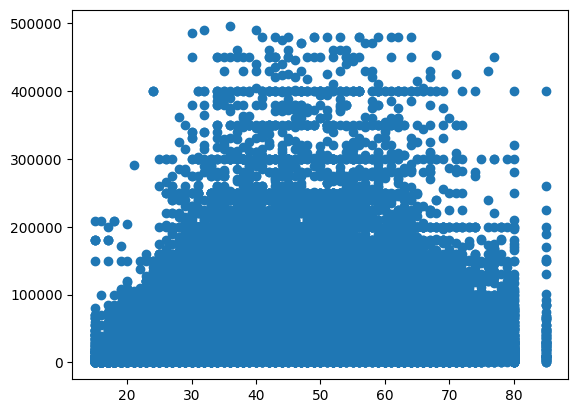

In [64]:
plt.plot(X, y, 'o');

In [65]:
###to use linearregression in sklearn, you need to have complete shape.

print(X)
print(X.shape)

X = X[:, np.newaxis]
print(X.shape)


0         42
2         64
3         26
4         24
5         36
          ..
121111    29
121112    26
121113    20
121115    64
121117    49
Name: age, Length: 71014, dtype: int64
(71014,)
(71014, 1)


/var/folders/4c/cwssnd4s4f90ddlftq3ng__r0000gn/T/ipykernel_2008/2062173253.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


In [66]:
model.fit(X, y)

LinearRegression()

In [67]:
print(model.coef_)
print(model.intercept_)

[709.67750953]
28198.01005420524


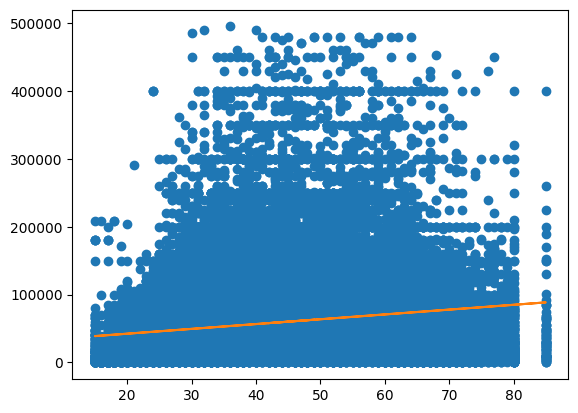

In [69]:
plt.plot(X, y, 'o')
plt.plot(X, model.intercept_+model.coef_*X, label='Linear regression (Scikit-learn GLM)')
plt.show()

#### to get standard error and calculate t-statistics, you need to calculate everything by hand.
#### but there is a package that does it for you. 


In [70]:
import statsmodels.api as sm
### if you want to include beta_0, you need to add a constant to X.
X2 = sm.add_constant(X)

##linear regression
ols = sm.OLS(y,X2)

ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                incwage   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2713.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:12:47   Log-Likelihood:            -8.7304e+05
No. Observations:               71014   AIC:                         1.746e+06
Df Residuals:                   71012   BIC:                         1.746e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.82e+04    606.932     46.460      0.000     2.7e+04    2.94e+04
x1           709.6775     13.625     52.087      0.000     682.973     736.382
==============================================================================
Omnibus:                    40288.380   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           415714.123
Skew:                           2.577   Prob(JB):                         0.00
Kurtosis:                      13.674   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
###Heteroskedastic robust standard error

ols = sm.OLS(y,X2)
ols_result = ols.fit(cov_type='HC1')
ols_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                incwage   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2998.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:51:23   Log-Likelihood:            -8.7304e+05
No. Observations:               71014   AIC:                         1.746e+06
Df Residuals:                   71012   BIC:                         1.746e+06
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.82e+04    516.494     54.595      0.000    2.72e+04    2.92e+04
x1           709.6775     12.960     54.758      0.000     684.276     735.079
==============================================================================
Omnibus:                    40288.380   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           415714.123
Skew:                           2.577   Prob(JB):                         0.00
Kurtosis:                      13.674   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

#### Can calculate the standard error by hand but I did not introduce these calculations in class. So just for knowledge.

In [119]:
y_hat = model.predict(X)
residuals = y.values - y_hat
residuals

array([-13804.46545464, -25617.37066439,  -6649.62530209, ...,
         2608.43975511, -48617.37066439, -31972.20802138])

In [120]:
residual_sum_of_squares = residuals.T @ residuals
residual_sum_of_squares
N = len(X)
p = X.shape[1] + 1

In [121]:
sigma_squared_hat = residual_sum_of_squares / (N - p)
var_beta_hat = np.linalg.inv(X2.T @ X2) * sigma_squared_hat
for p_ in range(p):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    print(f"SE(beta_hat[{p_}]): {standard_error}")

SE(beta_hat[0]): 606.9322385473005
SE(beta_hat[1]): 13.624756603244965
